# **Notebook Evaluations**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waste-pictures/test/bandaid/bandaid (34).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (95).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (90).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (102).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (30).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (43).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (24).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (19).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (17).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (15).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (67).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (81).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (49).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (53).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (74).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (82).jpg
/kaggle/input/waste-pictures/test/bandaid/bandaid (116)

**Imports**

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import seaborn as sn
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
train_path = '/kaggle/input/waste-pictures/train'
test_path = '/kaggle/input/waste-pictures/test'

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 128
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(IMAGE_SIZE,IMAGE_SIZE), classes=['XLight','bandaid','battery','bowlsanddishes','bread','bulb','cans','carton','chopsticks','cigarettebutt',
'diapers','facialmask','glassbottle','leaflet','leftovers','medicinebottle','milkbox','nailpolishbottle'
,'napkin','newspaper','nut','penholder','pesticidebottle','plasticbag','plasticbottle','plasticene',
'rag','tabletcapsule','thermometer','toothbrush','toothpastetube','toothpick','traditionalChinesemedicine','watermelonrind'],
                         batch_size = BATCH_SIZE, shuffle=False)

Found 5756 images belonging to 34 classes.


# **Creating Basic Functions for Evaluation**

In [5]:
def model_score (y_test,y_pred):
    st = 'macro'
    ac  = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average = st)
    re  = recall_score(y_test, y_pred, average = st)
    f1  = f1_score(y_test, y_pred, average = st) 
    results = [ac,pre,re, f1]
    return results

In [6]:
def plott(train,val,x_test,x_val,x):
    import seaborn as sn
    sn.set(font_scale=1)
    plt.rcParams['figure.figsize']=10,5
    sn.set_style("darkgrid")
    plt.plot(train, label= x_test,linewidth=5)
    plt.plot(val, label  = x_val,linewidth=5)
    plt.xlabel('epoch',fontsize = 20)
    plt.ylabel(x,fontsize = 20 )
    plt.grid(True)
    plt.legend()
    plt.title("Model Performance", fontsize = 20)
    plt.show()

In [7]:
def print_summary(ac,pr,re,f):
    print("Accuracy    =", ac)
    print("Precision   =", pr)
    print("Recall      =", re)
    print("F1 Score    =", f)
    print("\n")

In [8]:
def plott_s(x,y,z):
    import matplotlib.pyplot as plt
    import seaborn as sn
    sn.set(font_scale=1)
    plt.rcParams['figure.figsize']=10,5
    sn.set_style("darkgrid")
    ax = sn.barplot(x, y, palette = "rocket", saturation =1.5)
    plt.xlabel("CNN Statistical Scores", fontsize = 20 )
    plt.ylabel(z, fontsize = 20)
    plt.title(z, fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import seaborn as sn
    sn.set(font_scale=2)
    plt.rcParams['figure.figsize']=40,25
    sn.set_style("darkgrid")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Plotting some of the test images**

In [10]:
imgs, labels = next(test_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

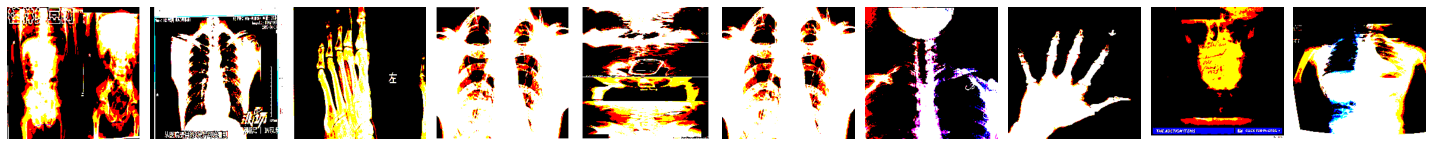

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [11]:
plotImages(imgs)
print(labels)

**Loading the models**

In [12]:
model_vgg = keras.models.load_model('../input/d/datasets/oceanmonjur/trained-models/final_model_vgg16.h5')
model_resnet50 = keras.models.load_model('../input/d/datasets/oceanmonjur/trained-models/model_resnet50.h5')
model_mobilenet = keras.models.load_model('../input/d/datasets/oceanmonjur/trained-models/model_mobilenet.h5')

2022-05-18 20:59:01.568429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 20:59:01.730564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 20:59:01.731613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 20:59:01.733164: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# **ResNet50**

**Computing the Confusion Matrix**

In [13]:
predictions = model_resnet50.predict(x = test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)
y_test  = y_true = test_batches.classes
y_pred  = y_pred = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,y_pred)
print(cm)

2022-05-18 20:59:13.041508: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-18 20:59:16.490207: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


[[145   0   0 ...   4   0   2]
 [  0  84   2 ...   0   0   0]
 [  0   0 189 ...   0   0   0]
 ...
 [  0   2   1 ...   9   0   1]
 [  1   0   0 ...   0  24   6]
 [  0   1   0 ...   0   0 113]]


In [14]:
scores = model_resnet50.evaluate(test_batches)
print("Accuracy:",scores[1]*100)

45/45 [==============================] - 67s 1s/step - loss: 1.3596 - accuracy: 0.7005
Accuracy: 70.0486421585083


In [15]:
w = model_score(y_test,y_pred)
print_summary(w[0],w[1],w[2],w[3])

Accuracy    = 0.700486448922863
Precision   = 0.7219710104431146
Recall      = 0.6480245258885402
F1 Score    = 0.6468047776164539




**Plotting the Statistical Scores**

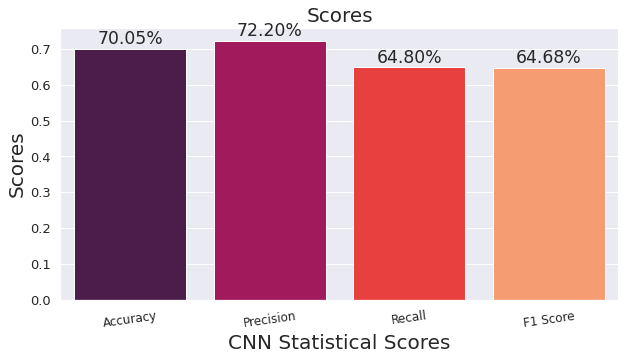

In [16]:
score = ["Accuracy","Precision","Recall","F1 Score"]
plott_s(score,w,"Scores")

In [17]:
test_batches.class_indices

{'XLight': 0,
 'bandaid': 1,
 'battery': 2,
 'bowlsanddishes': 3,
 'bread': 4,
 'bulb': 5,
 'cans': 6,
 'carton': 7,
 'chopsticks': 8,
 'cigarettebutt': 9,
 'diapers': 10,
 'facialmask': 11,
 'glassbottle': 12,
 'leaflet': 13,
 'leftovers': 14,
 'medicinebottle': 15,
 'milkbox': 16,
 'nailpolishbottle': 17,
 'napkin': 18,
 'newspaper': 19,
 'nut': 20,
 'penholder': 21,
 'pesticidebottle': 22,
 'plasticbag': 23,
 'plasticbottle': 24,
 'plasticene': 25,
 'rag': 26,
 'tabletcapsule': 27,
 'thermometer': 28,
 'toothbrush': 29,
 'toothpastetube': 30,
 'toothpick': 31,
 'traditionalChinesemedicine': 32,
 'watermelonrind': 33}

**Plottinng the confusion matrix**

Confusion matrix, without normalization
[[145   0   0 ...   4   0   2]
 [  0  84   2 ...   0   0   0]
 [  0   0 189 ...   0   0   0]
 ...
 [  0   2   1 ...   9   0   1]
 [  1   0   0 ...   0  24   6]
 [  0   1   0 ...   0   0 113]]


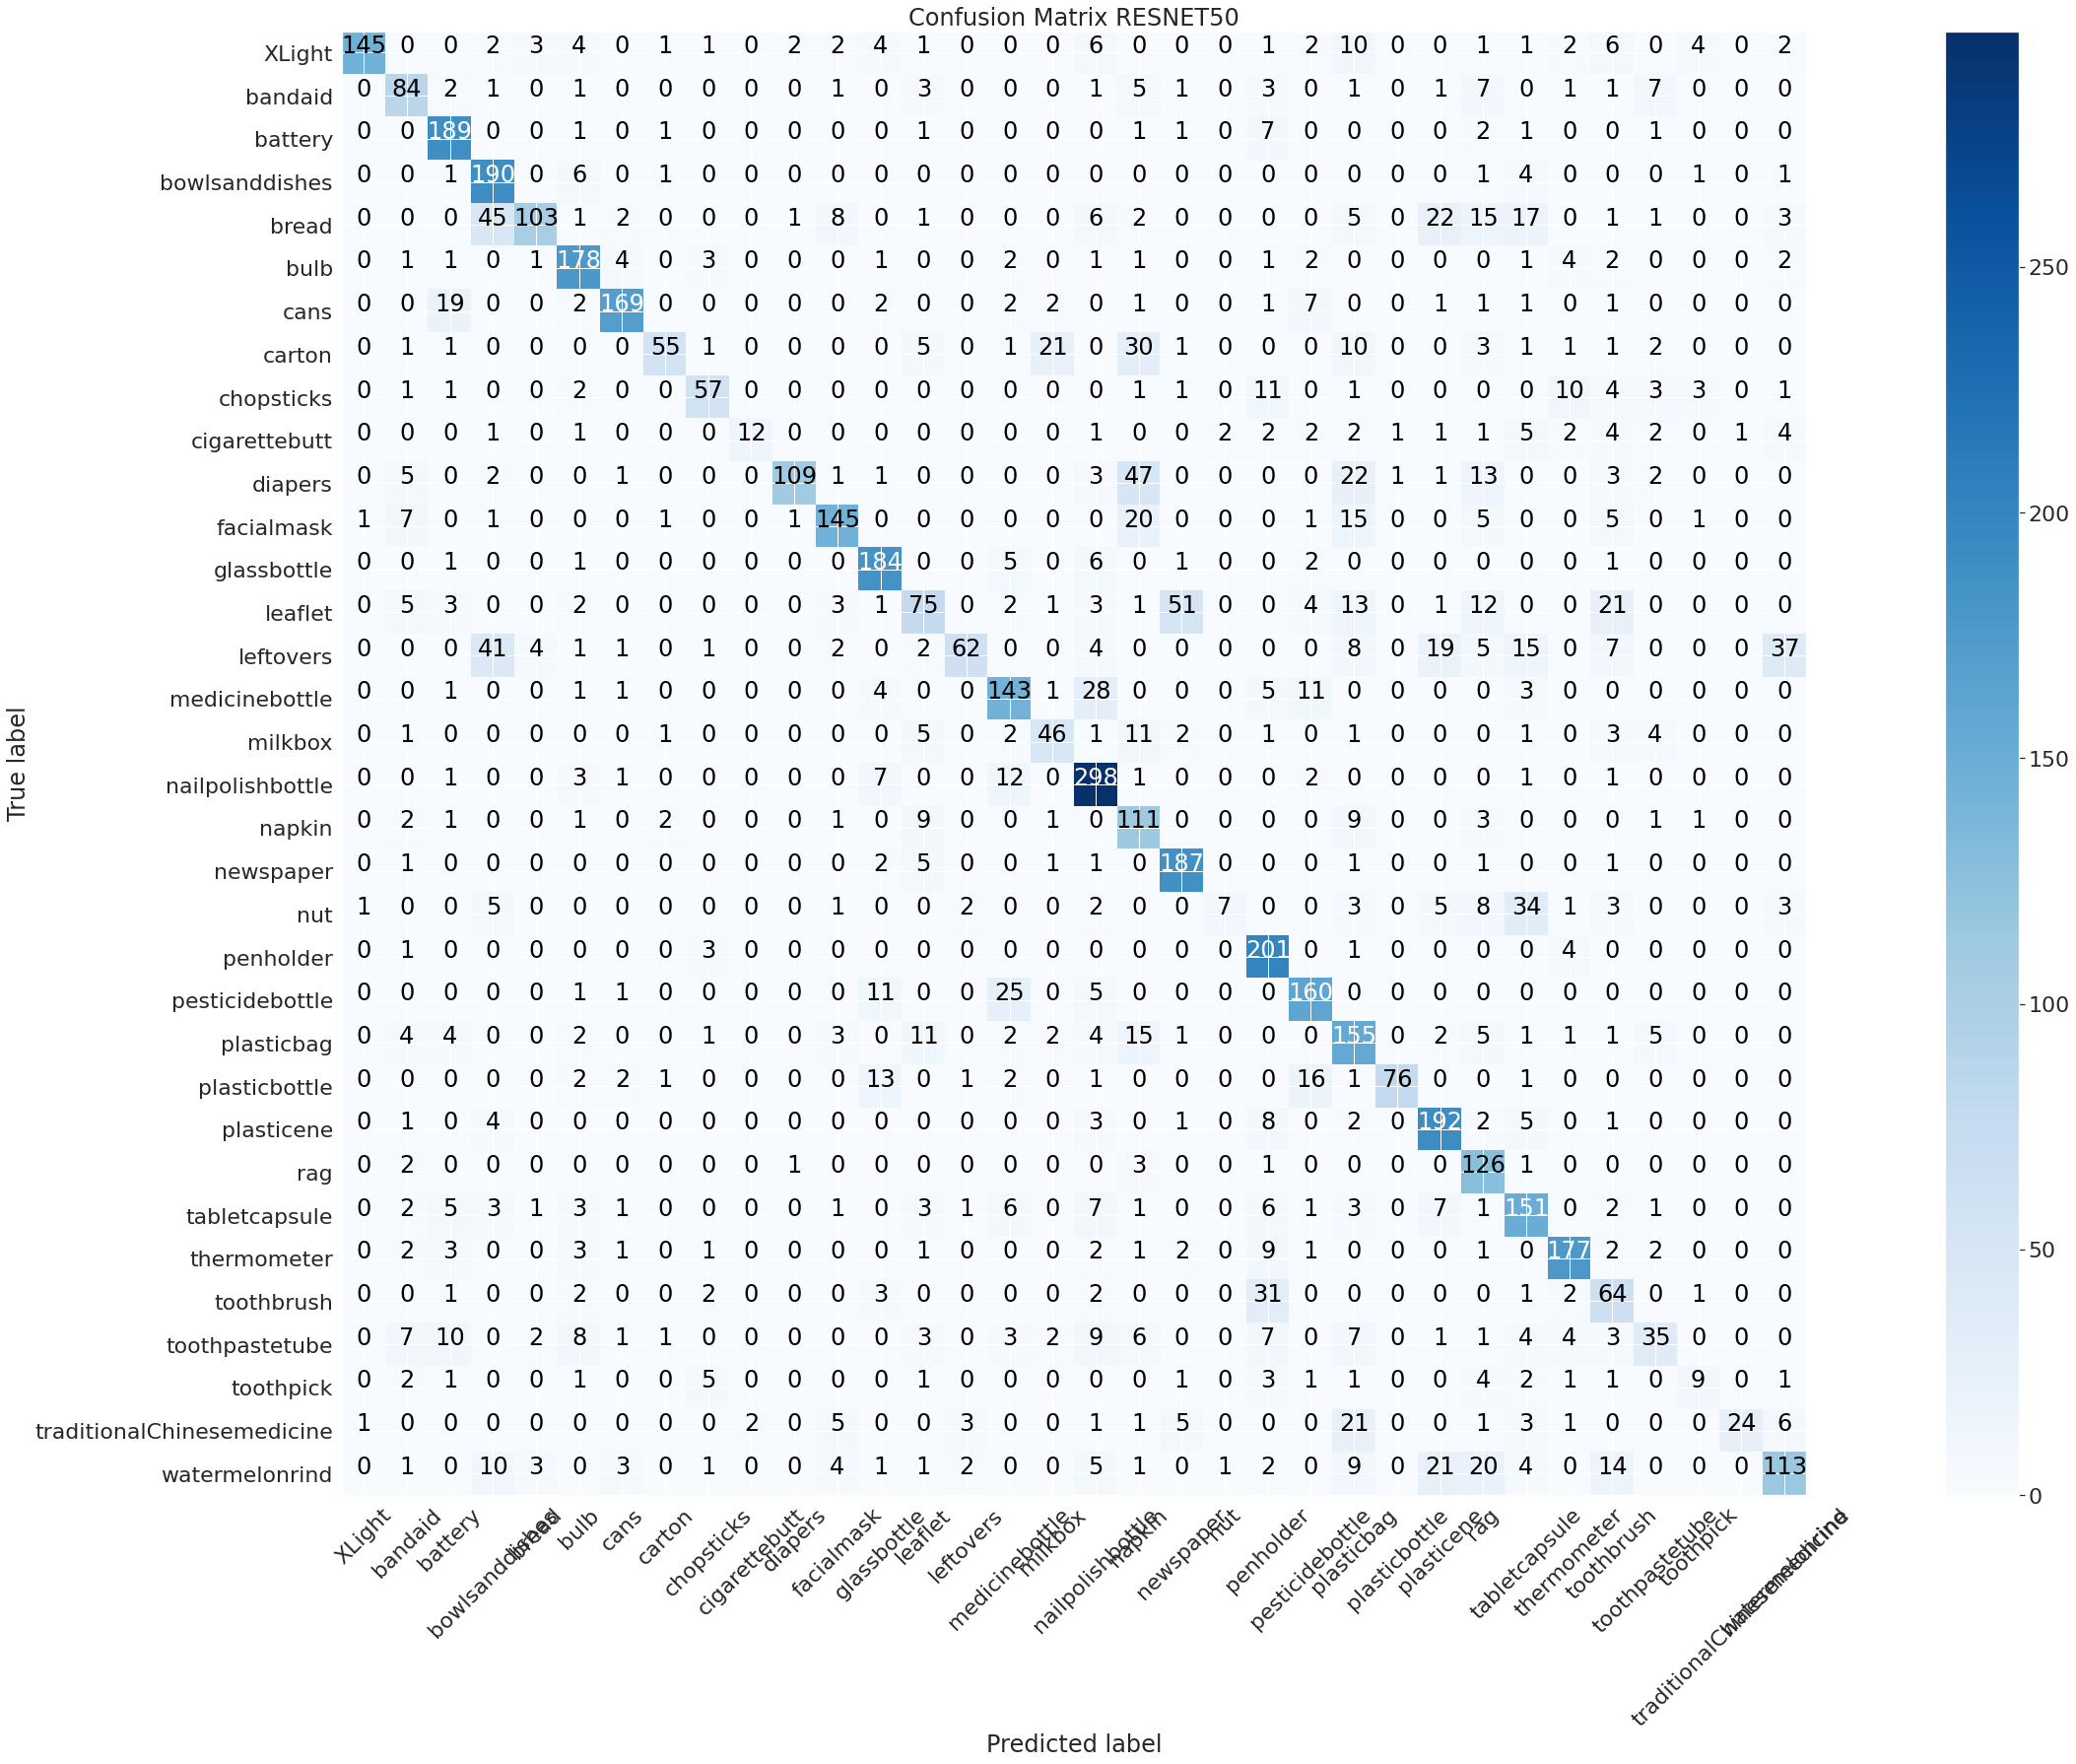

In [18]:
cm_plot_labels = ['XLight','bandaid','battery','bowlsanddishes','bread','bulb','cans','carton','chopsticks','cigarettebutt',
'diapers','facialmask','glassbottle','leaflet','leftovers','medicinebottle','milkbox','nailpolishbottle'
,'napkin','newspaper','nut','penholder','pesticidebottle','plasticbag','plasticbottle','plasticene',
'rag','tabletcapsule','thermometer','toothbrush','toothpastetube','toothpick','traditionalChinesemedicine','watermelonrind']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix RESNET50')

# **MobileNetV2**

**Computing the Confusion Matrix**

In [19]:
predictions = model_mobilenet.predict(x = test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)
y_test  = y_true = test_batches.classes
y_pred  = y_pred = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[116   0   0 ...   0   0   0]
 [ 13   1  10 ...   3   0   0]
 [  2   0 136 ...   0   0   0]
 ...
 [  3   0   1 ...   2   0   0]
 [ 19   0   2 ...   0   0   0]
 [ 14   0   0 ...   1   0   0]]


In [20]:
w = model_score(y_test,y_pred)
print_summary(w[0],w[1],w[2],w[3])

Accuracy    = 0.2333217512161223
Precision   = 0.2721216974773499
Recall      = 0.19867883754813612
F1 Score    = 0.16012221185820513




/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Plotting the Statistical Scores**

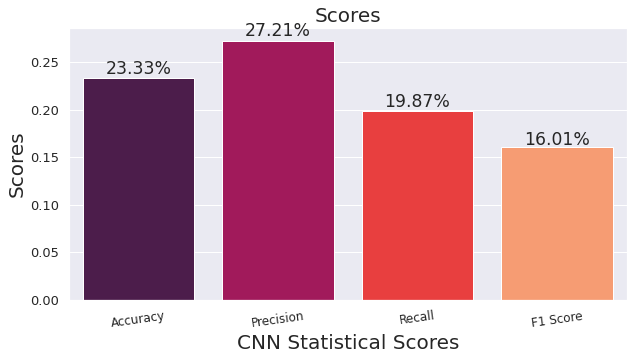

In [21]:
score = ["Accuracy","Precision","Recall","F1 Score"]
plott_s(score,w,"Scores")

In [22]:
test_batches.class_indices

{'XLight': 0,
 'bandaid': 1,
 'battery': 2,
 'bowlsanddishes': 3,
 'bread': 4,
 'bulb': 5,
 'cans': 6,
 'carton': 7,
 'chopsticks': 8,
 'cigarettebutt': 9,
 'diapers': 10,
 'facialmask': 11,
 'glassbottle': 12,
 'leaflet': 13,
 'leftovers': 14,
 'medicinebottle': 15,
 'milkbox': 16,
 'nailpolishbottle': 17,
 'napkin': 18,
 'newspaper': 19,
 'nut': 20,
 'penholder': 21,
 'pesticidebottle': 22,
 'plasticbag': 23,
 'plasticbottle': 24,
 'plasticene': 25,
 'rag': 26,
 'tabletcapsule': 27,
 'thermometer': 28,
 'toothbrush': 29,
 'toothpastetube': 30,
 'toothpick': 31,
 'traditionalChinesemedicine': 32,
 'watermelonrind': 33}

**Plottinng the confusion matrix**

Confusion matrix, without normalization
[[116   0   0 ...   0   0   0]
 [ 13   1  10 ...   3   0   0]
 [  2   0 136 ...   0   0   0]
 ...
 [  3   0   1 ...   2   0   0]
 [ 19   0   2 ...   0   0   0]
 [ 14   0   0 ...   1   0   0]]


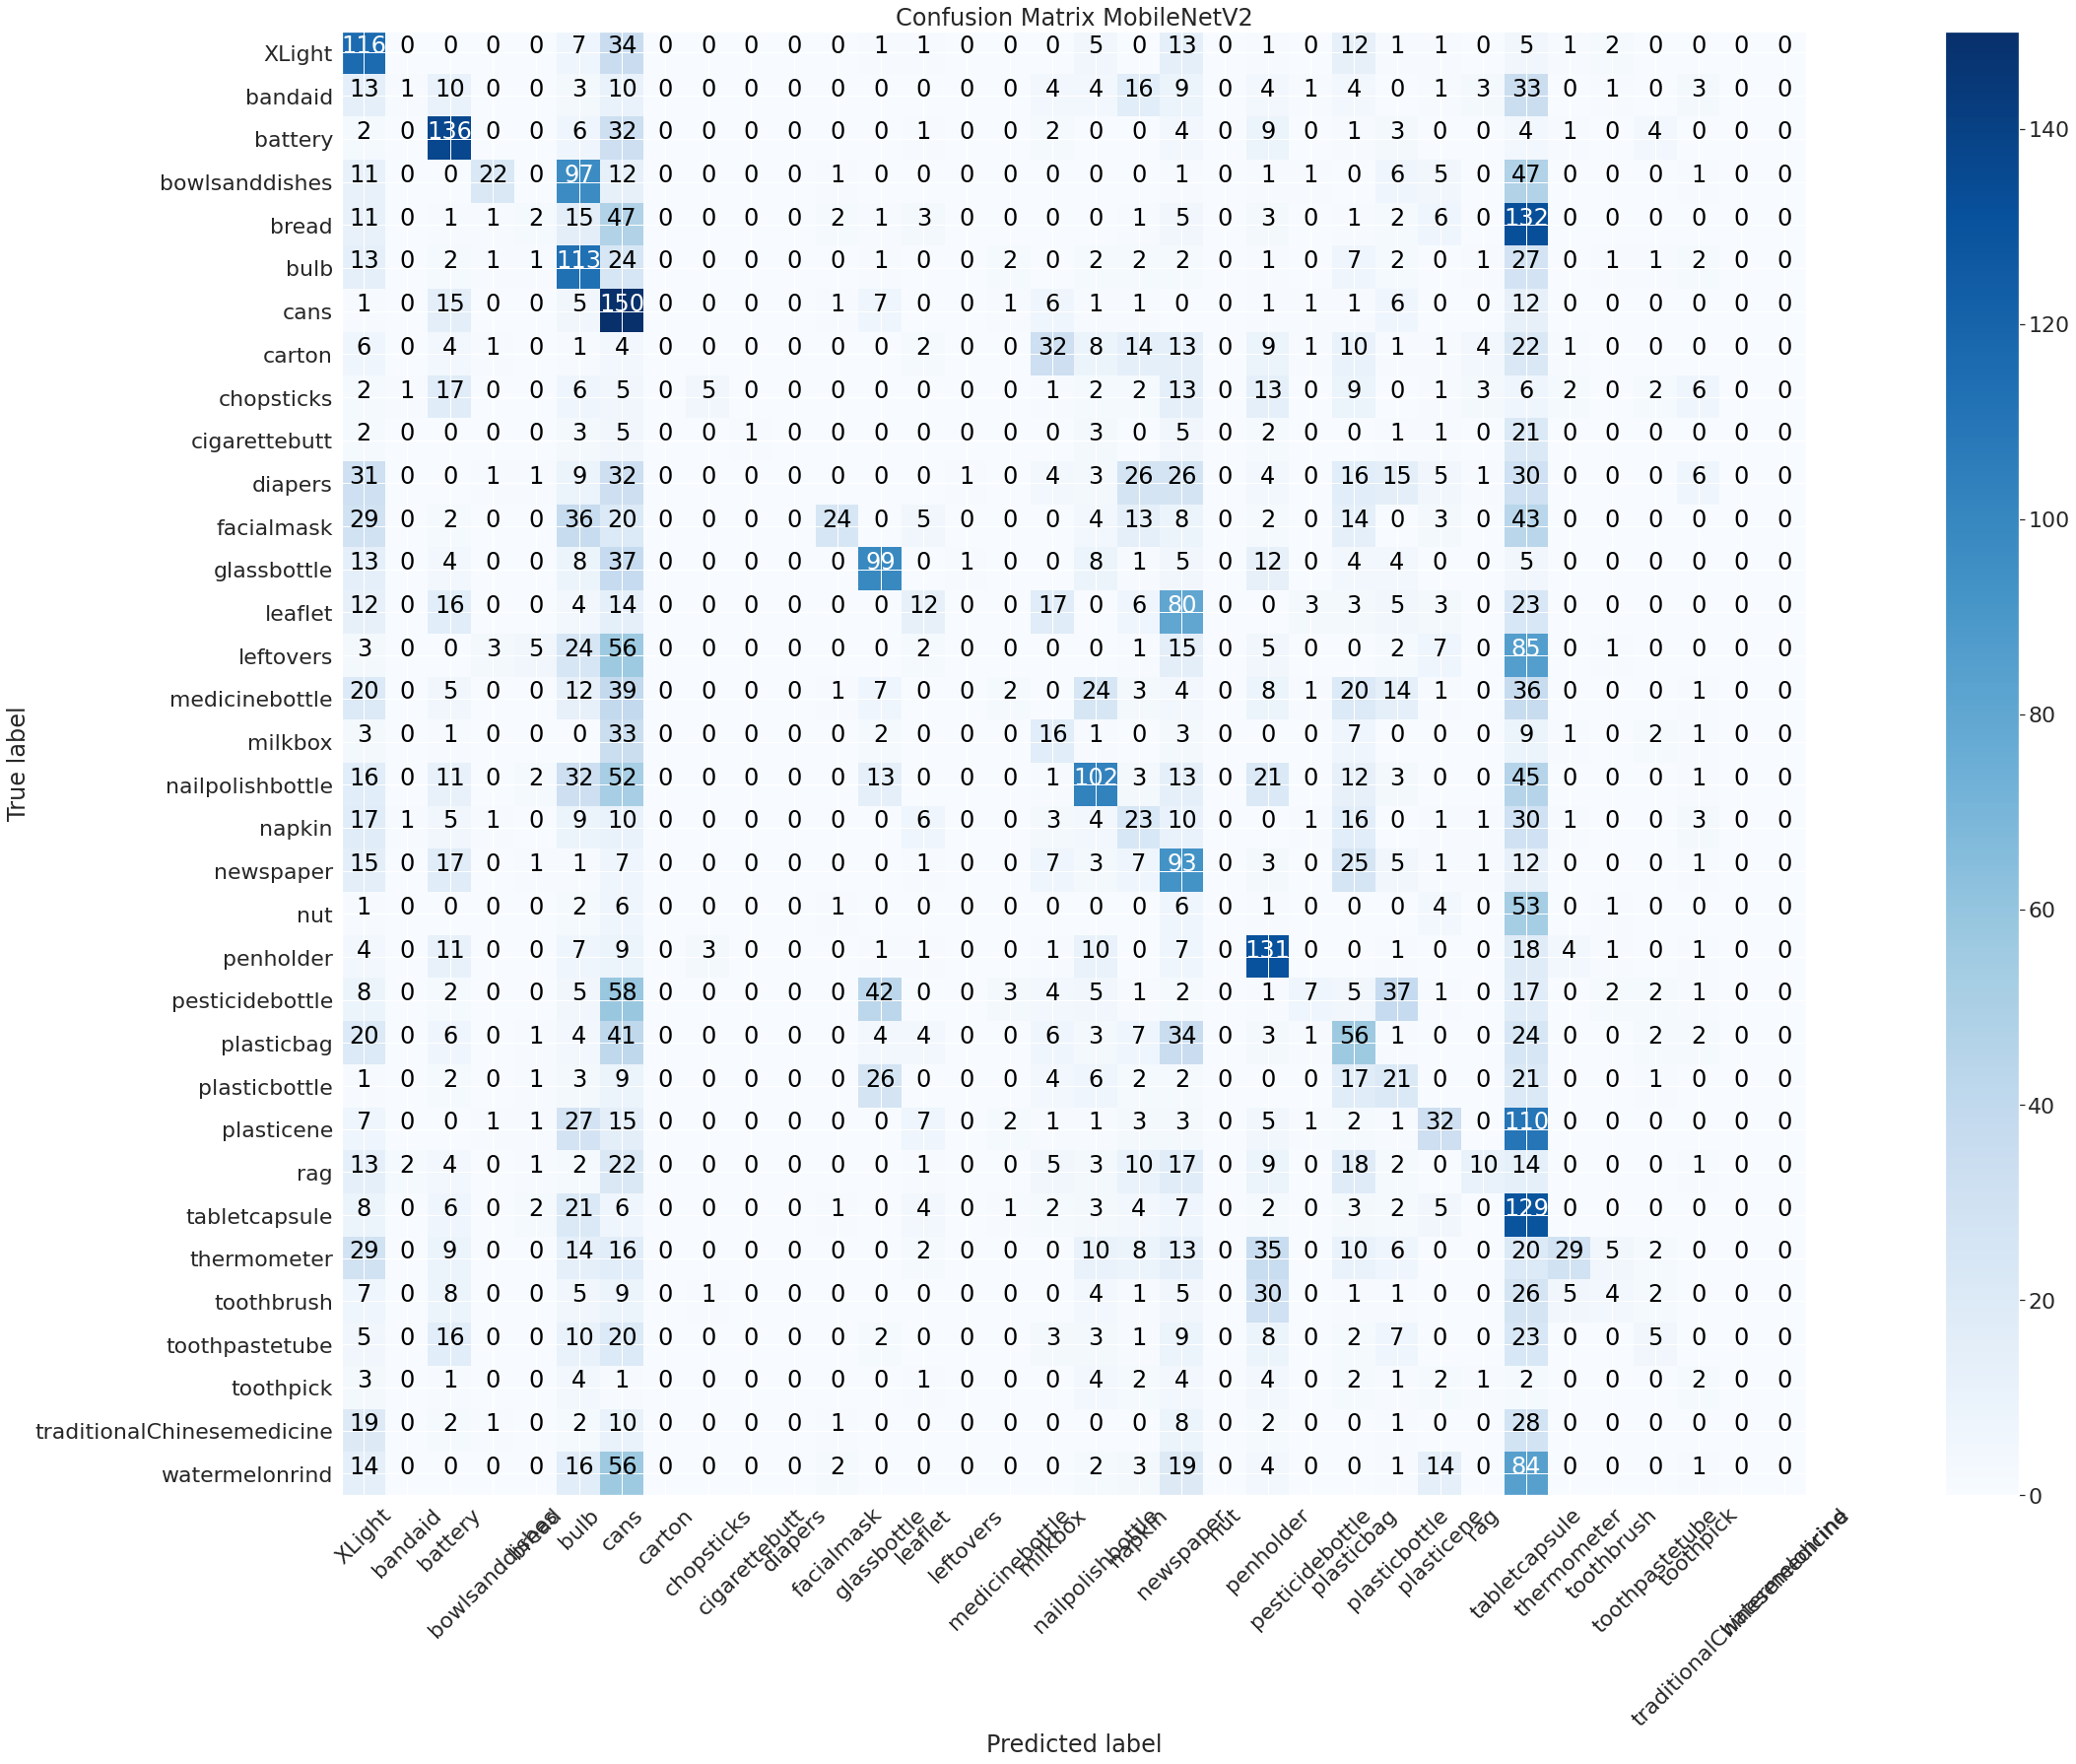

In [23]:
cm_plot_labels = ['XLight','bandaid','battery','bowlsanddishes','bread','bulb','cans','carton','chopsticks','cigarettebutt',
'diapers','facialmask','glassbottle','leaflet','leftovers','medicinebottle','milkbox','nailpolishbottle'
,'napkin','newspaper','nut','penholder','pesticidebottle','plasticbag','plasticbottle','plasticene',
'rag','tabletcapsule','thermometer','toothbrush','toothpastetube','toothpick','traditionalChinesemedicine','watermelonrind']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix MobileNetV2')

# **VGG 16**

**Computing the Confusion Matrix**

In [24]:
predictions = model_vgg.predict(x = test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)
y_test  = y_true = test_batches.classes
y_pred  = y_pred = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[182   0   0 ...   0   0   0]
 [  3  22   1 ...   0   0   0]
 [  0   0 190 ...   0   0   0]
 ...
 [  4   2   1 ...   1   0   0]
 [  2   0   0 ...   0   0   0]
 [  1   0   1 ...   0   0   4]]


In [25]:
w = model_score(y_test,y_pred)
print_summary(w[0],w[1],w[2],w[3])

Accuracy    = 0.5036483669214733
Precision   = 0.557551593327553
Recall      = 0.4433508560380478
F1 Score    = 0.3984661035220237




/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Plotting the Statistical Scores**

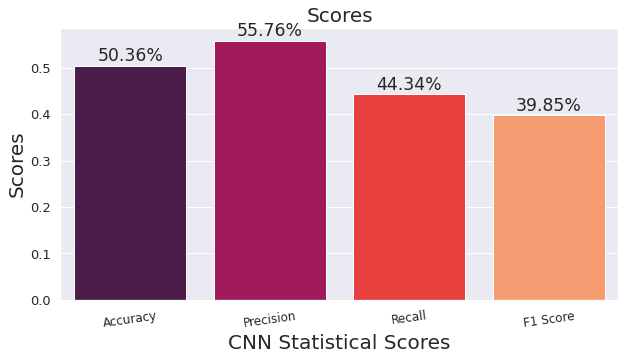

In [26]:
score = ["Accuracy","Precision","Recall","F1 Score"]
plott_s(score,w,"Scores")

In [27]:
test_batches.class_indices

{'XLight': 0,
 'bandaid': 1,
 'battery': 2,
 'bowlsanddishes': 3,
 'bread': 4,
 'bulb': 5,
 'cans': 6,
 'carton': 7,
 'chopsticks': 8,
 'cigarettebutt': 9,
 'diapers': 10,
 'facialmask': 11,
 'glassbottle': 12,
 'leaflet': 13,
 'leftovers': 14,
 'medicinebottle': 15,
 'milkbox': 16,
 'nailpolishbottle': 17,
 'napkin': 18,
 'newspaper': 19,
 'nut': 20,
 'penholder': 21,
 'pesticidebottle': 22,
 'plasticbag': 23,
 'plasticbottle': 24,
 'plasticene': 25,
 'rag': 26,
 'tabletcapsule': 27,
 'thermometer': 28,
 'toothbrush': 29,
 'toothpastetube': 30,
 'toothpick': 31,
 'traditionalChinesemedicine': 32,
 'watermelonrind': 33}

**Plottinng the confusion matrix**

Confusion matrix, without normalization
[[182   0   0 ...   0   0   0]
 [  3  22   1 ...   0   0   0]
 [  0   0 190 ...   0   0   0]
 ...
 [  4   2   1 ...   1   0   0]
 [  2   0   0 ...   0   0   0]
 [  1   0   1 ...   0   0   4]]


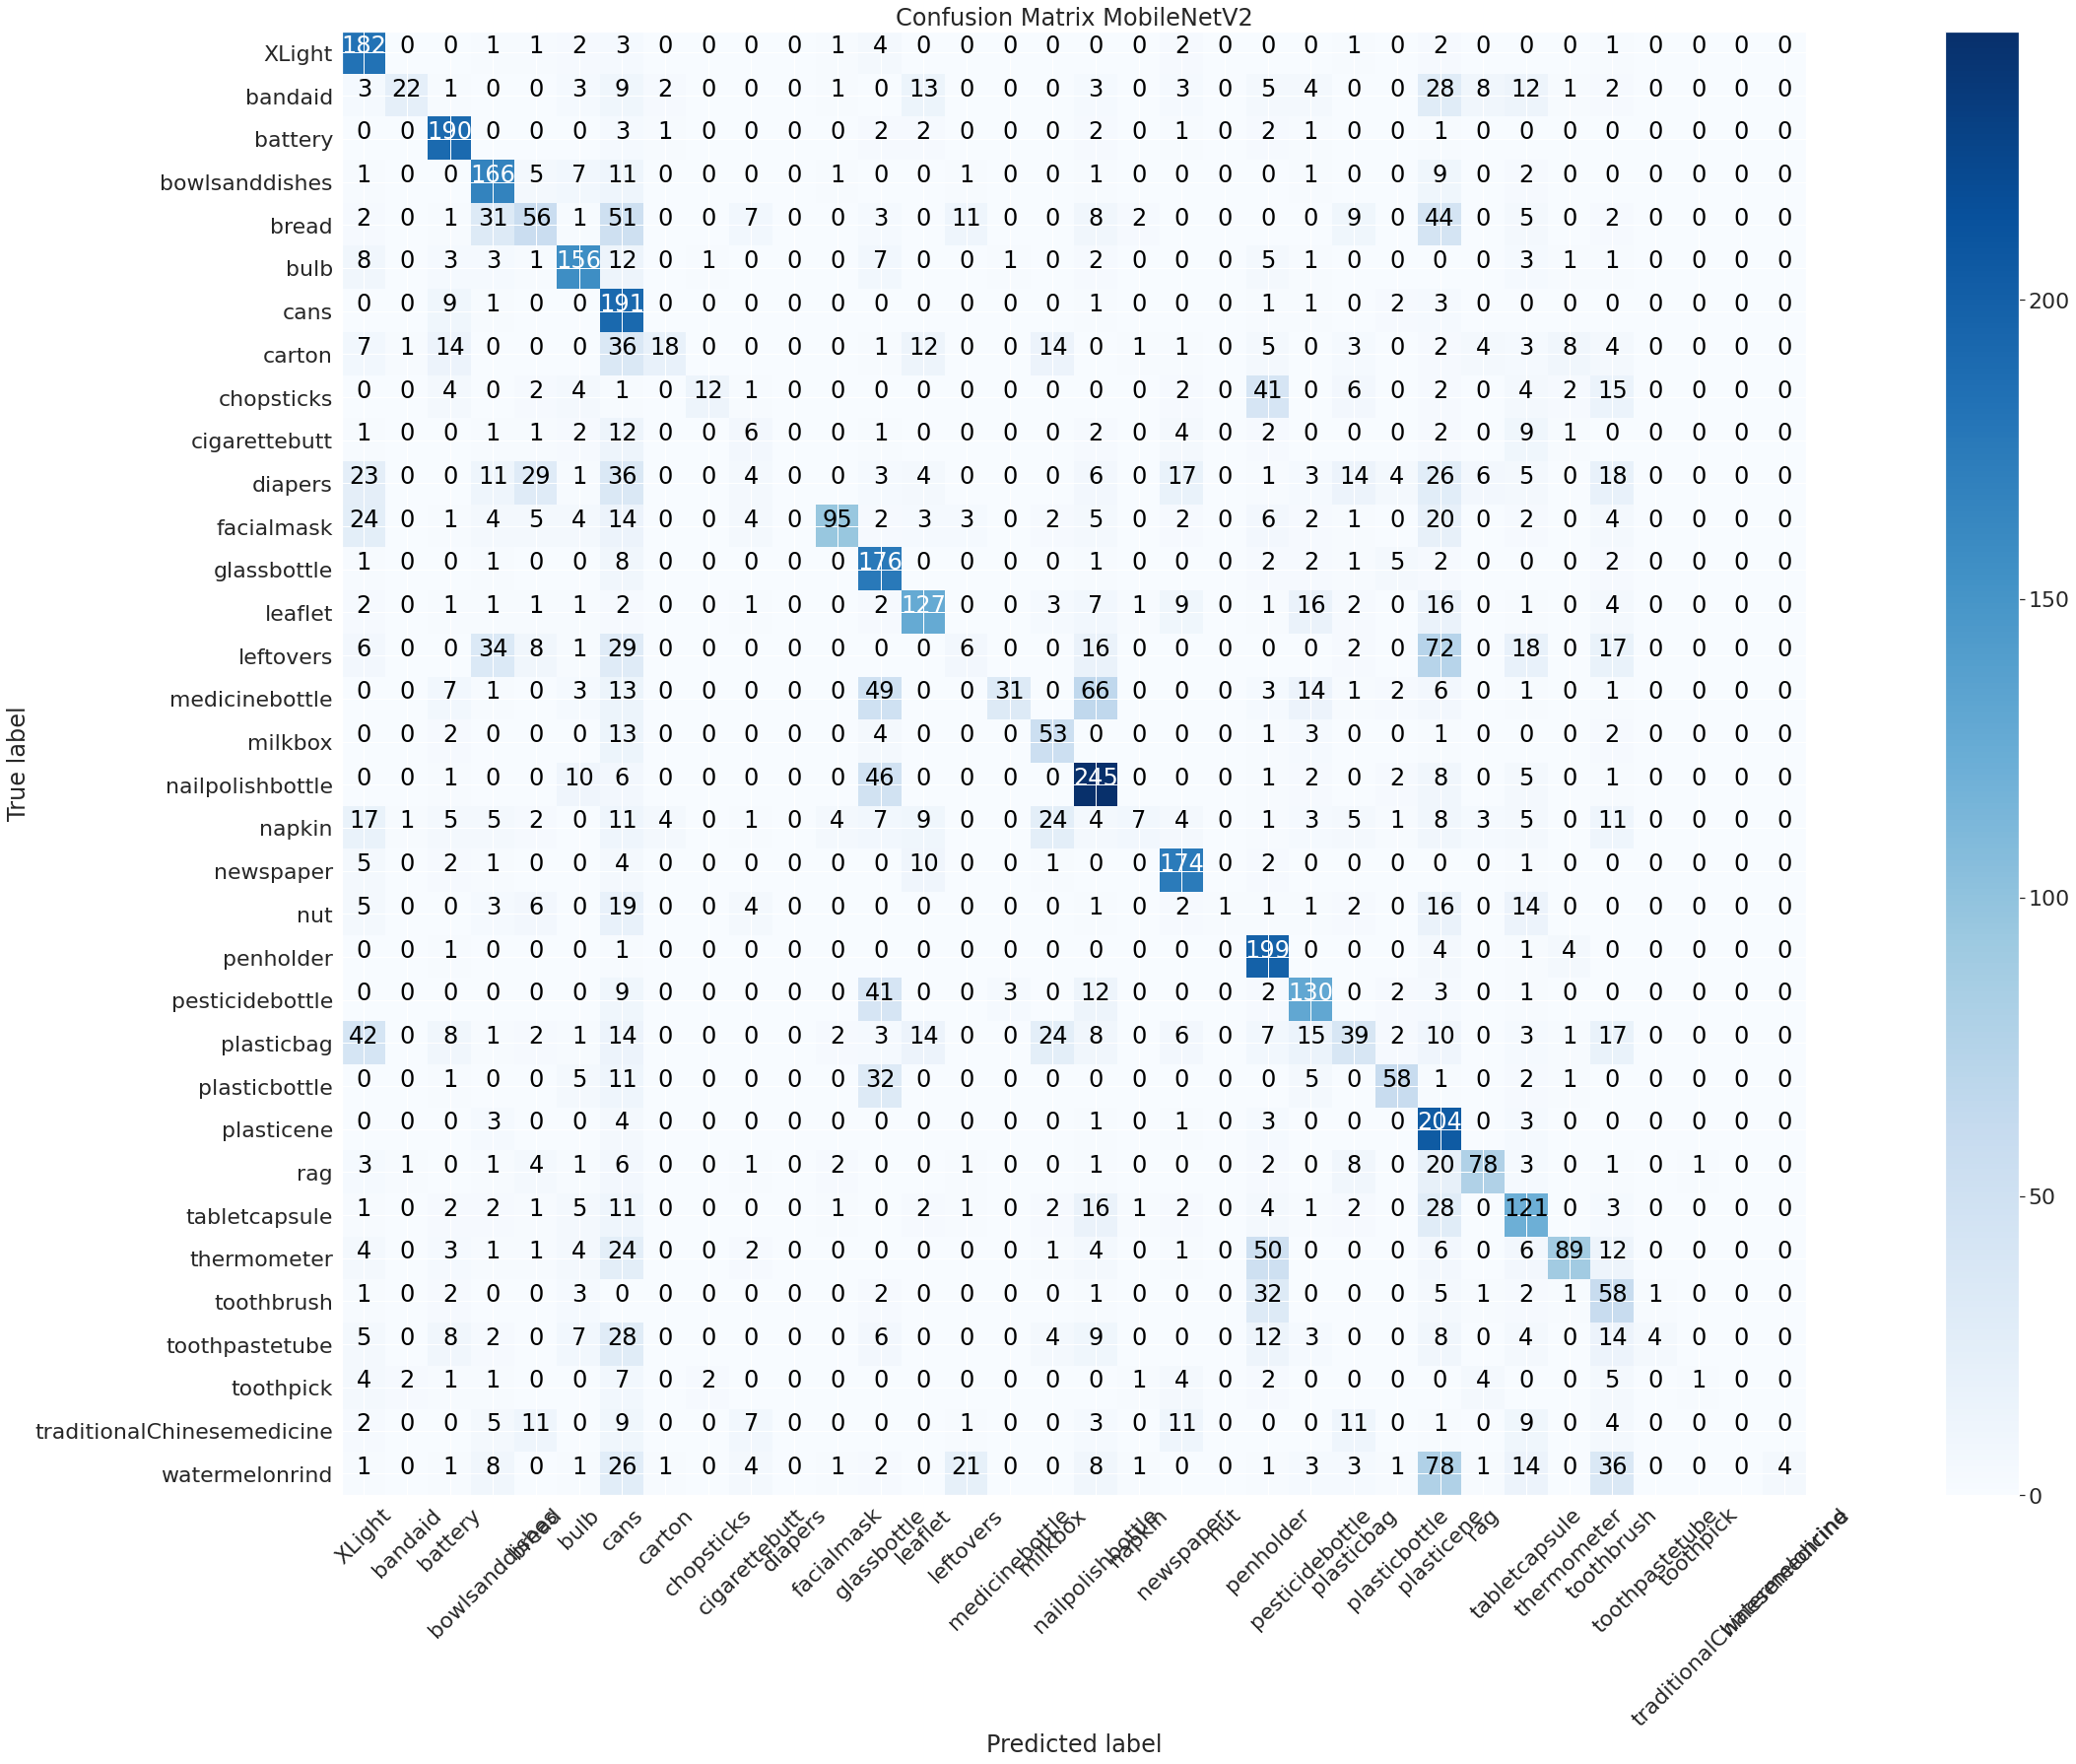

In [28]:
cm_plot_labels = ['XLight','bandaid','battery','bowlsanddishes','bread','bulb','cans','carton','chopsticks','cigarettebutt',
'diapers','facialmask','glassbottle','leaflet','leftovers','medicinebottle','milkbox','nailpolishbottle'
,'napkin','newspaper','nut','penholder','pesticidebottle','plasticbag','plasticbottle','plasticene',
'rag','tabletcapsule','thermometer','toothbrush','toothpastetube','toothpick','traditionalChinesemedicine','watermelonrind']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix MobileNetV2')